<a href="https://colab.research.google.com/github/Ashoksai-tech/Advance_deep_learning_projects/blob/main/Tomato_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach for the problem

1. Load the model and libraries

2. Declare the model
     
     * sequential
     * functional

3. Declare the layers

4. Dense, Dropout

5. Neurons,Activation Function

6. compile the model

       * optimizer (adam,sgd)
       * loss (rmse,cross_entropy,mse)
       * metrics(F1_Score,Recall, Precision)

7. fit the model


In [2]:
!pip install  opendatasets

# Import the necessary libraries

In [3]:
import opendatasets as od
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization,GlobalAveragePooling2D
import pandas as pd

# Load the Dataset

In [4]:
od.download('https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashoksaigece
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:11<00:00, 16.4MB/s]


In [5]:
train_dir = "/content/tomatoleaf/tomato/train"
test_dir = "/content/tomatoleaf/tomato/val"

In [6]:
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(train_dir)
class_names = train_generator.class_indices.keys()
class_names

Found 10000 images belonging to 10 classes.


dict_keys(['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'])

In [7]:
pd.DataFrame(list(class_names), columns=['Class Names'])

,Class Names
0,Tomato___Bacterial_spot
1,Tomato___Early_blight
2,Tomato___Late_blight
3,Tomato___Leaf_Mold
4,Tomato___Septoria_leaf_spot
5,Tomato___Spider_mites Two-spotted_spider_mite
6,Tomato___Target_Spot
7,Tomato___Tomato_Yellow_Leaf_Curl_Virus
8,Tomato___Tomato_mosaic_virus
9,Tomato___healthy


In [8]:
train_dataset = image_dataset_from_directory(train_dir,batch_size=64,image_size=(512,512),class_names=class_names)

Found 10000 files belonging to 10 classes.


In [9]:
test_dataset = image_dataset_from_directory(test_dir,batch_size=16,image_size=(512,512),class_names=class_names)

Found 1000 files belonging to 10 classes.


In [10]:
for batch_img,batch_label in train_dataset.take(1):
  print(batch_img.shape)
  print(batch_label.numpy())

(64, 512, 512, 3)
[4 5 1 3 6 5 1 6 4 2 8 7 0 9 9 2 0 5 4 7 5 1 8 3 6 4 9 5 7 3 2 6 2 7 1 6 7
 3 6 4 4 5 1 7 8 8 5 5 0 5 1 5 2 1 0 7 1 3 6 1 6 0 7 8]


In [11]:
for batch_img,batch_label in test_dataset.take(1):
  print(batch_img.shape)
  print(batch_label.numpy())

(16, 512, 512, 3)
[1 9 0 4 7 9 5 9 5 6 6 0 6 8 5 7]


# visualize the Images

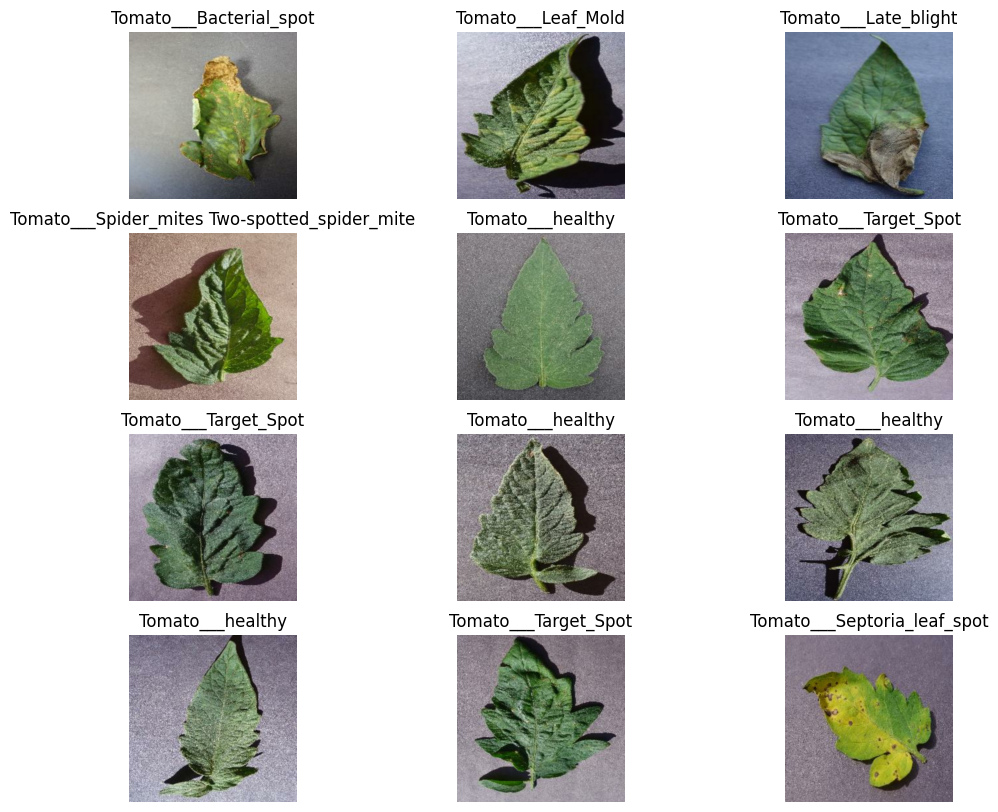

In [47]:
plt.figure(figsize=(12, 10))
for images, labels in train_dataset.take(1):
    class_names_list = list(class_names)
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names_list[labels[i]])
        plt.axis('off')  # Turn off the axis
    plt.show()


# Preprocessing

In [12]:
def normalize(image,labels):
  image = tf.cast(image/255.0,tf.float32)
  return image,labels

In [13]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [14]:
for image, label in train_dataset.take(1):
    print(image)
    print(label)

tf.Tensor(
[[[[0.5372549  0.5058824  0.5568628 ]
   [0.5264706  0.49509802 0.54607844]
   [0.50490195 0.4735294  0.5245098 ]
   ...
   [0.6754902  0.66764706 0.722549  ]
   [0.6696078  0.6617647  0.71666664]
   [0.6666667  0.65882355 0.7137255 ]]

  [[0.5656863  0.53431374 0.5852941 ]
   [0.55563724 0.5242647  0.5752451 ]
   [0.5355392  0.50416666 0.55514705]
   ...
   [0.67720586 0.6693627  0.7242647 ]
   [0.67083335 0.6629902  0.71789217]
   [0.66764706 0.6598039  0.7147059 ]]

  [[0.622549   0.59117645 0.64215684]
   [0.6139706  0.58259803 0.6335784 ]
   [0.59681374 0.5654412  0.6164216 ]
   ...
   [0.68063724 0.6727941  0.72769606]
   [0.6732843  0.66544116 0.7203431 ]
   [0.6696078  0.6617647  0.71666664]]

  ...

  [[0.5990196  0.5754902  0.63039213]
   [0.5980392  0.5745098  0.62941176]
   [0.59607846 0.57254905 0.627451  ]
   ...
   [0.5688726  0.57279414 0.6551471 ]
   [0.56740195 0.5713235  0.65367645]
   [0.56666666 0.57058823 0.65294117]]

  [[0.6598039  0.6362745  0.691176

# Define, Compile and fit the model

In [15]:
model = Sequential()

#block 1
model.add(Conv2D(32,3,activation='relu',input_shape=(512,512,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#block 2
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(len(class_names),activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1016064)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      65,028,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,048,202 (248.14 MB)

 Trainable params: 65,048,202 (248.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Callbacks
callbacks = [
    EarlyStopping(patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)
]

In [19]:
hist = model.fit(train_dataset,epochs=10,validation_data=test_dataset,callbacks=callbacks)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.3898 - loss: 4.1671
Epoch 1: val_loss improved from inf to 0.99855, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 514ms/step - accuracy: 0.3909 - loss: 4.1523 - val_accuracy: 0.6670 - val_loss: 0.9985
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.7903 - loss: 0.6215
Epoch 2: val_loss improved from 0.99855 to 0.64332, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 505ms/step - accuracy: 0.7906 - loss: 0.6206 - val_accuracy: 0.7880 - val_loss: 0.6433
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.9082 - loss: 0.2849
Epoch 3: val_loss improved from 0.64332 to 0.63734, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 453ms/step - accuracy: 0.9083 - loss: 0.2845 - val_accuracy: 0.8250 - val_loss: 0.6373
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9554 - loss: 0.1517
Epoch 4: val_loss did not improve f

In [20]:
model.evaluate(test_dataset)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8388 - loss: 0.5647


[0.6373447179794312, 0.824999988079071]

# interpret the results

In [21]:
import pandas as pd
train_result = model.evaluate(train_dataset)
test_result = model.evaluate(test_dataset)

no_augmented_df = pd.DataFrame(zip(train_result,test_result),columns=['Train','Val'],index=['Loss','Acc'])
no_augmented_df

157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.9625 - loss: 0.1277
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8364 - loss: 0.5850


,Train,Val
Loss,0.100871,0.637345
Acc,0.970800,0.825000


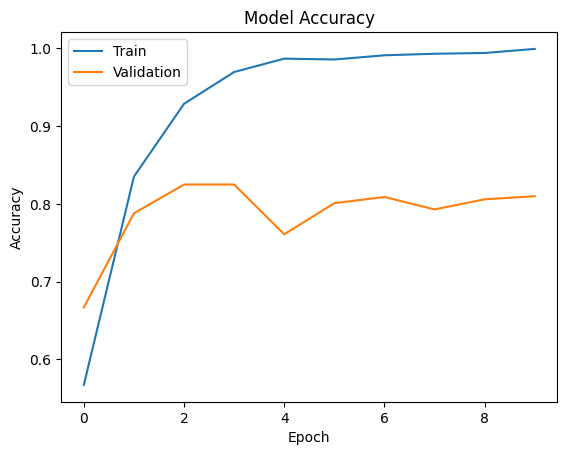

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

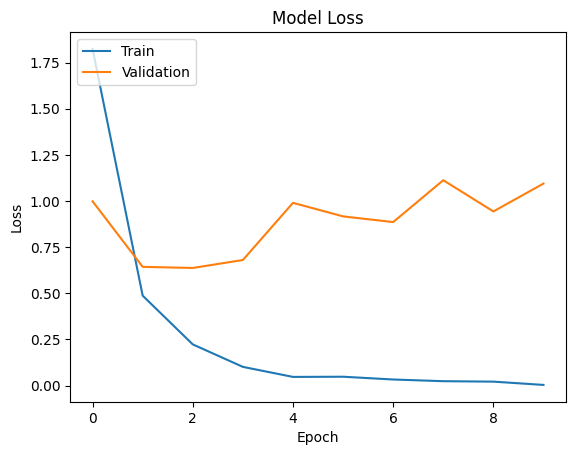

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluation Metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


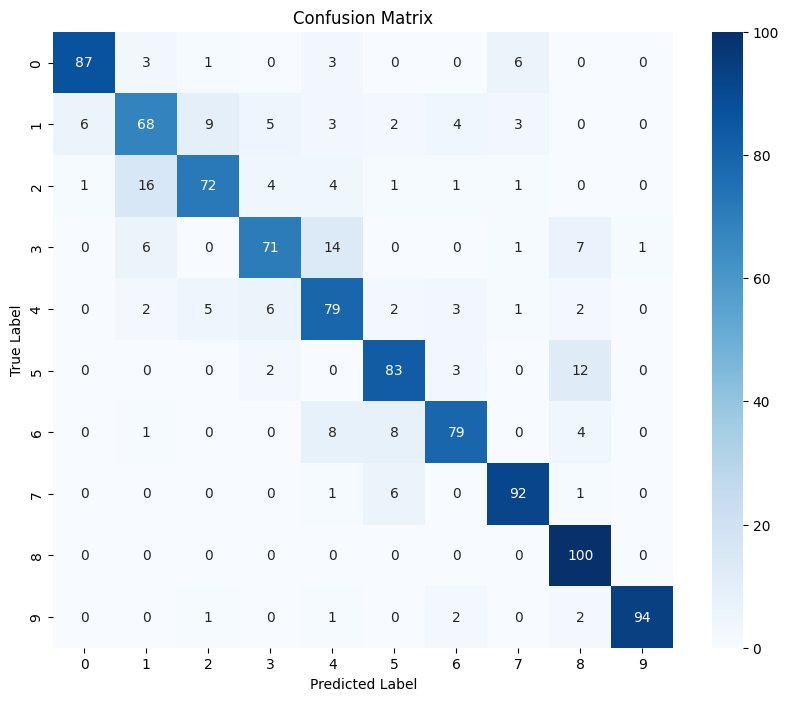

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

val_labels = []
val_preds = []

for images, labels in test_dataset:
    # Convert labels to integer labels (if labels are one-hot encoded)
    if len(labels.shape) > 1 and labels.shape[-1] > 1:
        labels = np.argmax(labels.numpy(), axis=-1)

    val_labels.extend(labels.numpy())  # Assuming labels are now integers or a list of integers

    # Predict using the model and convert to integer predictions
    predictions = model.predict(images)
    predictions = np.argmax(predictions, axis=-1)  # Convert predictions to class labels
    val_preds.extend(predictions)

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save the confusion matrix plot

plt.show()


In [33]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate on validation dataset
# val_loss, val_acc = model.evaluate(test_dataset)
# print(f"Validation accuracy: {val_acc:.2f}")

# Get the true labels and predictions
val_labels = []
val_predictions = []

for images, labels in test_dataset:
    preds = model.predict(images)
    val_predictions.extend(np.argmax(preds, axis=1))  # Convert predictions to class indices

    # Append labels directly if they are already integers
    val_labels.extend(labels.numpy())  # True labels

# Compute precision, recall, and F1 score
val_precision = precision_score(val_labels, val_predictions, average='weighted')
val_recall = recall_score(val_labels, val_predictions, average='weighted')
val_f1 = f1_score(val_labels, val_predictions, average='weighted')

print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 score: {val_f1:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 

In [37]:
import os
import random
import tensorflow as tf

img_height,img_width = 512,512

# Path to the validation directory
test_dir = "/content/tomatoleaf/tomato/val"

# Get list of disease folders
disease_folders = os.listdir(test_dir)

# Class names
class_names = {
    0: 'bacterial spot',
    1: 'early blight',
    2: 'late blight',
    3: 'leaf mold',
    4: 'Septoria',
    5: 'spider mites',
    6: 'target spot',
    7: 'yellow leaf',
    8: 'mosaic',
    9: 'healthy'
}

# Iterate 10 times
for _ in range(10):
    print(f"Iteration {_ + 1}:")
    # Choose a random disease folder
    random_folder_name = random.choice(disease_folders)
    # Get list of images in the random disease folder
    images = os.listdir(os.path.join(test_dir, random_folder_name))
    # Choose a random image from the folder
    random_image = random.choice(images)
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(
        os.path.join(test_dir, random_folder_name, random_image),
        target_size=(img_height, img_width)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    img_array = img_array / 255.0  # Normalize
    # Predict disease label using the model
    predictions = model.predict(img_array)
    predicted_label = predictions.argmax(axis=-1)[0]
    # Update class_names dictionary if predicted_label is not in the dictionary
    if predicted_label not in class_names:
        class_names[predicted_label] = f'Class {predicted_label}'
    # Get the class name from the folder name
    actual_label = random_folder_name.split('___')[-1]
    # Print the predicted label and actual label
    print(f"Predicted: {class_names[predicted_label]}, Actual: {actual_label}")
    print()

Iteration 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: mosaic, Actual: Tomato_mosaic_virus

Iteration 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted: healthy, Actual: healthy

Iteration 3:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Septoria, Actual: Septoria_leaf_spot

Iteration 4:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted: Septoria, Actual: Septoria_leaf_spot

Iteration 5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted: early blight, Actual: Bacterial_spot

Iteration 6:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted: spider mites, Actual: Target_Spot

Iteration 7:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: leaf mold, Actual: Leaf_Mold

Iteration 8:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: late blight, Actual: Late_blight

Iteration 9:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: mosaic, Actual: Spider_mites Two-spotted_spider_mite

Iteration 10:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: Septoria, Actual: Leaf_Mold



In [39]:
model.save('trained_model_leaf_disease_detection.h5')